In [5]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final


#**5. Train, đánh giá và lưu model sklearn**

##**5.1 Model Sklearn**

####**Import các thư viện cần thiết**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score,f1_score
import matplotlib.pyplot as plt

import joblib
import pickle
import h5py
import numpy as np
import os
import glob
import cv2

###**5.1.1 Vector local binary patterns**

In [2]:
train_lbps = 'H5PY/raw_train/train_lbps_za.h5'
train_label = 'H5PY/raw_train/labels_train.h5'

In [7]:
h5f_train = h5py.File(train_lbps, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [8]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [9]:
data = np.array(data)
labels = np.array(labels)

In [10]:
h5f_train.close()
h5f_labels.close()

In [11]:
data.shape

(10876, 26)

In [12]:
# create models sklearn
models_lbps = []
models_lbps.append(LogisticRegression(random_state=42,max_iter=100000))
models_lbps.append(DecisionTreeClassifier(random_state=42))
models_lbps.append(KNeighborsClassifier())
models_lbps.append(GaussianNB())
models_lbps.append(SVC(random_state=42,max_iter=100000))

In [13]:
results_accuracy = [[] for _ in range(len(models_lbps))]
results_f1 = [[] for _ in range(len(models_lbps))]
names = ['' for _ in range(len(models_lbps))]

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models_lbps)):
        model = models_lbps[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


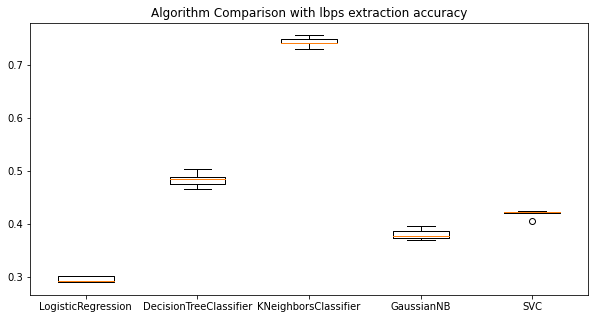

In [15]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with lbps extraction accuracy')
plt.show()

In [16]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.2953285581473969 (0.005179128491256585)
DecisionTreeClassifier: 0.48344937457741716 (0.012928027783964829)
KNeighborsClassifier: 0.7435633451656525 (0.008317342615557038)
GaussianNB: 0.3804692782285328 (0.009885050210829168)
SVC: 0.419547456051386 (0.00732647282419937)


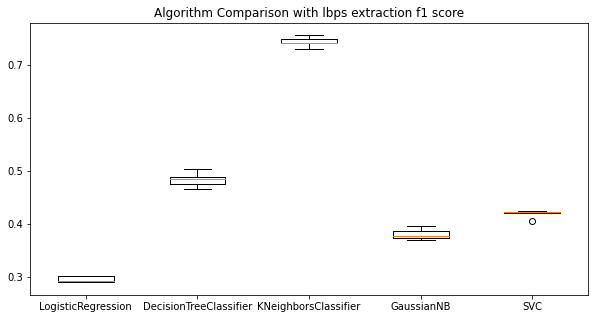

In [17]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with lbps extraction f1 score')
plt.show()

In [18]:
score_f1 = np.array(results_f1)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.2953285581473969 (0.005179128491256585)
DecisionTreeClassifier: 0.48344937457741716 (0.012928027783964829)
KNeighborsClassifier: 0.7435633451656525 (0.008317342615557003)
GaussianNB: 0.38046927822853277 (0.009885050210829142)
SVC: 0.419547456051386 (0.00732647282419937)


In [19]:
model_path = 'H5PY/model_raw_data/knn_lbps.sav'

In [20]:
joblib.dump(models_lbps[2], model_path)

['H5PY/model_raw_data/knn_lbps.sav']

###**5.1.2 Vector histogram**

In [17]:
train_hog = 'H5PY/raw_train/train_hog.h5'
train_label = 'H5PY/raw_train/labels_train.h5'

In [18]:
h5f_train = h5py.File(train_hog, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [19]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [20]:
data = np.array(data)
labels = np.array(labels)

In [21]:
h5f_train.close()
h5f_labels.close()

In [22]:
data.shape

(10876, 144)

In [23]:
# create models sklearn
models_hog = []
models_hog.append(LogisticRegression(random_state=42,max_iter=100000))
models_hog.append(DecisionTreeClassifier(random_state=42))
models_hog.append(KNeighborsClassifier())
models_hog.append(GaussianNB())
models_hog.append(SVC(random_state=42,max_iter=100000))

In [24]:
results_accuracy = [[] for _ in range(len(models_hog))]
results_f1 = [[] for _ in range(len(models_hog))]
names = ['' for _ in range(len(models_hog))]

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models_hog)):
        model = models_hog[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


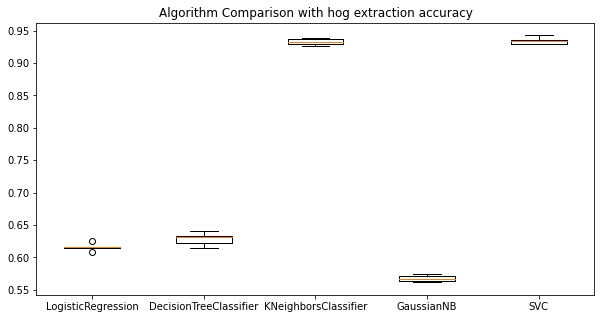

In [26]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with hog extraction accuracy')
plt.show()

In [28]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_hog)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.6159425709939148 (0.005302844631979983)
DecisionTreeClassifier: 0.6286323951994591 (0.009067975054543776)
KNeighborsClassifier: 0.9324195824881677 (0.004557351043281352)
GaussianNB: 0.5673954952670723 (0.004778396343872259)
SVC: 0.9338916075050709 (0.005108244493362071)


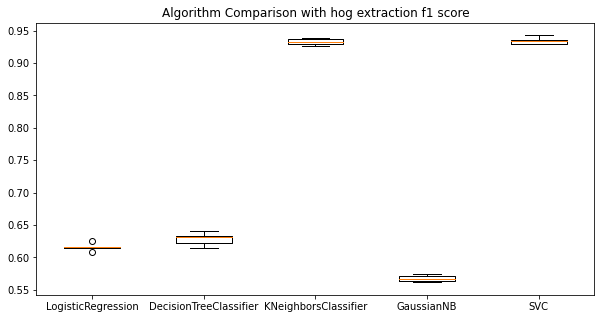

In [29]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with hog extraction f1 score')
plt.show()

In [31]:
score_f1 = np.array(results_f1)
for i in range(len(models_hog)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.6159425709939148 (0.005302844631979983)
DecisionTreeClassifier: 0.6286323951994591 (0.009067975054543776)
KNeighborsClassifier: 0.9324195824881677 (0.004557351043281352)
GaussianNB: 0.5673954952670723 (0.004778396343872259)
SVC: 0.9338916075050709 (0.005108244493362071)


In [ ]:
test_hog = 'H5PY/test/test_hog.h5'
test_label = 'H5PY/test/labels_test.h5'

In [32]:
model_path = 'H5PY/model_raw_data/svm_hog.sav'

In [33]:
joblib.dump(models_hog[4], model_path)

['H5PY/model_raw_data/svm_hog.sav']